[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Kinzer_and_Gunn_1951/fig_7.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Kinzer_and_Gunn_1951/fig_7.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Kinzer_and_Gunn_1951/fig_7.ipynb)

# fig. 7 from [Kinzer and Gunn 1951 (J. Meteor.)](https://doi.org/10.1175/1520-0469(1951)008%3C0071:TETATR%3E2.0.CO;2)
# "The evaporation, temperature and thermal relaxation-time of freely falling waterdrops"

In [7]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from PySDM import Formulae
from PySDM.physics import si, in_unit
from open_atmos_jupyter_utils import show_plot

from PySDM_examples.Kinzer_And_Gunn_1951.table_1_and_2 import table1

In [9]:
formulae = Formulae(
    ventilation='PruppacherAndRasmussen1979',
    diffusion_thermics='Neglect',
    air_dynamic_viscosity='ZografosEtAl1987',
    terminal_velocity='RogersYau',
)
const = formulae.constants
temperature=293.15 *si.K
radii = table1['Radius [cm]']*si.cm

pressure = const.p_STP
pvs = formulae.saturation_vapour_pressure.pvs_water(temperature)
v_term = formulae.terminal_velocity.v_term(radii)
eta_air=formulae.air_dynamic_viscosity.eta_air(temperature)
D=formulae.diffusion_thermics.D(T=temperature, p=pressure)
air_density =const.p_STP/const.Rd/temperature
Sc = formulae.trivia.air_schmidt_number(
    dynamic_viscosity=eta_air, 
    diffusivity=formulae.diffusion_thermics.D(T=temperature, p=const.p_STP), 
    density=air_density,
)
Re = formulae.particle_shape_and_density.reynolds_number(
     radius=radii,
     velocity_wrt_air=v_term,
     dynamic_viscosity=eta_air,
     density=air_density,
)
sqrt_re_times_cbrt_sc = formulae.trivia.sqrt_re_times_cbrt_sc(
        Re=Re,
        Sc=Sc
    )
f = formulae.ventilation.ventilation_coefficient(sqrt_re_times_cbrt_sc)
factor1 = table1['20'][:-2]

In [10]:
def F_KinzerGunn(data_table1, x, approx=False):
    """
    Calculate ventilation factor F(x) from Kinzer&Gunn1951 eq.29:
        - approx: bool - if True, eq.19b is used for calculation
    """
    sqrt_Re = np.sqrt(
    formulae.particle_shape_and_density.reynolds_number(
     radius=x,
     velocity_wrt_air=v_term,
     dynamic_viscosity=eta_air,
     density=air_density,
)
    )
    if approx:
        A = 0.22 * sqrt_Re
    else:
        A = np.sqrt(x/np.pi/D/2*v_term)
    return (data_table1 * si.cm  / np.pi / x - 1)/A #why it is divided by 1 not 4???

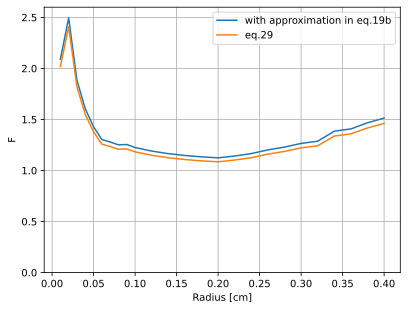

In [11]:
plt.plot(in_unit(radii,si.cm), F_KinzerGunn(factor1,radii,approx=True), label="with approximation in eq.19b")
plt.plot(in_unit(radii,si.cm), F_KinzerGunn(factor1,radii,approx=False), label="eq.29")
plt.xlabel('Radius [cm]')
plt.ylabel('F')
plt.grid()
plt.legend()
plt.ylim(0,2.6)
show_plot("F")